In [1]:
import numpy as np
import pandas as pd
import gzip
from os import listdir, mkdir
from os.path import split, isdir
import matplotlib.pyplot as plt
rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

In [2]:
data_path = '/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Data/Accessory_Genes.txt'
accessory_genes = eval(open(data_path).read())
accessory_genes_counts = {}
core_genomes = list(accessory_genes.keys())

In [3]:
for genome in core_genomes:
    genes = accessory_genes[genome]
    for g in genes:
        try:
            accessory_genes_counts[g]['Samples'].add(genome)
            accessory_genes_counts[g]['Counts'] += 1
        except KeyError:
            accessory_genes_counts[g] = {}
            accessory_genes_counts[g]['Samples'] = set([genome])
            accessory_genes_counts[g]['Counts'] = 1
            
df_accessory_gene_counts = pd.DataFrame(data = accessory_genes_counts)
df_accessory_gene_counts = df_accessory_gene_counts.T
df_accessory_gene_counts.index.name = 'Gene'
df_accessory_gene_counts['Sample_Count'] = df_accessory_gene_counts['Samples'].apply(len)
df_accessory_gene_counts = df_accessory_gene_counts.sort_values(by = 'Sample_Count', ascending = False)
df_accessory_gene_counts = df_accessory_gene_counts.reset_index()

2929


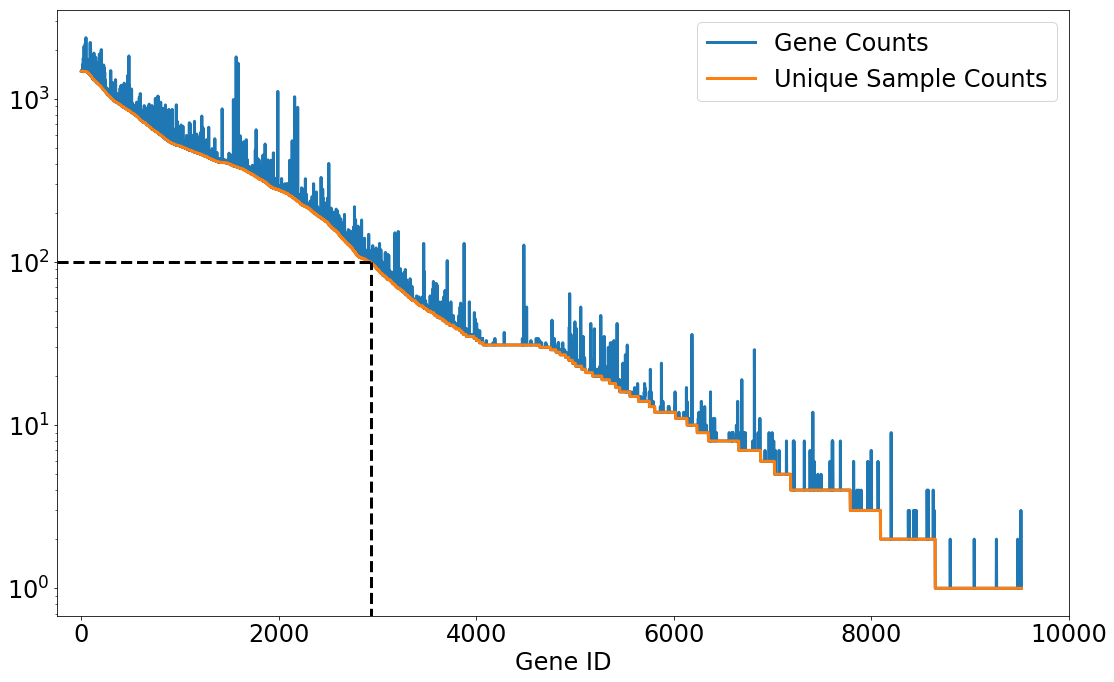

In [4]:
t = df_accessory_gene_counts[df_accessory_gene_counts['Sample_Count'] >= 100]
accessory_gene_filters = t['Gene'].tolist()
print(len(t))
plt.rcParams.update(rcParams)
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_accessory_gene_counts[['Counts', 'Sample_Count']].plot(ax = ax, linewidth = 3)
ax.legend(['Gene Counts', 'Unique Sample Counts'])
ax.set_xlabel('Gene ID')
ax.plot([-250,len(t)],[100,100], linestyle = '--',color = 'black', linewidth = 3)
ax.plot([len(t),len(t)],[0,100], linestyle = '--',color = 'black', linewidth = 3)
ax.set_xlim([-250,10000])
ax.set_yscale('log')
fig.tight_layout()
fig.savefig('/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Plots/Accessory_Gene_Counts.pdf')

In [5]:
Sample_Path = '/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Data/Processed_GBFF/'
out_path_prot = '/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Data/Accessory_Genes_Proteins/'
out_path_nuc = '/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Data/Accessory_Genes_Nucleotides/'

if not(isdir(out_path_prot)):
    mkdir(out_path_prot)

if not(isdir(out_path_nuc)):
    mkdir(out_path_nuc)

gene_prot_buf = {}
gene_nuc_buf = {}
for genome in core_genomes:
    df = pd.read_csv(Sample_Path+genome+'_genomic.txt.gz', sep = '\t')
    del df['Unnamed: 0']
    df = df[df['gene'].isin(accessory_gene_filters)]
    genes = df['gene'].tolist()
    prot_seq = df['translation'].tolist()
    nuc_seq = df['DNA'].tolist()
    gene_dict = {}
    for i in range(0, len(genes)):
        try:
            gene_dict[genes[i]]['Prot'].append(prot_seq[i])
            gene_dict[genes[i]]['DNA'].append(nuc_seq[i])
        except KeyError:
            gene_dict[genes[i]] = {'Prot':[prot_seq[i]], 'DNA':[nuc_seq[i]]}
    for g in gene_dict:
        if len(gene_dict[g]['Prot']) == 1:
            try:
                gene_prot_buf[g] += '>'+genome+'\n'
                gene_prot_buf[g] += gene_dict[g]['Prot'][0]+'\n'
                gene_nuc_buf[g] += '>'+genome+'\n'
                gene_nuc_buf[g] += gene_dict[g]['DNA'][0]+'\n'
            except KeyError:
                
                gene_prot_buf[g] =  '>'+genome+'\n'
                gene_prot_buf[g] += gene_dict[g]['Prot'][0]+'\n'
                gene_nuc_buf[g]  =  '>'+genome+'\n'
                gene_nuc_buf[g]  += gene_dict[g]['DNA'][0]+'\n'
        
        if len(gene_dict[g]['Prot']) > 1:
            proteins_g = gene_dict[g]['Prot']
            nuc_g = gene_dict[g]['DNA']
            for j in range(len(proteins_g)):
                try:
                    gene_prot_buf[g] += '>'+genome+'.'+str(j)+'\n'
                    gene_prot_buf[g] += proteins_g[j]+'\n'
                    gene_nuc_buf[g]  += '>'+genome+'.'+str(j)+'\n'
                    gene_nuc_buf[g]  += nuc_g[j]+'\n'
                except KeyError:
                    gene_prot_buf[g] = '>'+genome+'.'+str(j)+'\n'
                    gene_prot_buf[g] += proteins_g[j]+'\n'
                    gene_nuc_buf[g] = '>'+genome+'.'+str(j)+'\n'
                    gene_nuc_buf[g] += nuc_g[j]+'\n'
    print(genome)
    

GCF_900475675.1_45473_D02
GCF_005160405.1_ASM516040v1
GCF_000754345.1_ASM75434v1
GCF_001929095.2_ASM192909v2
GCF_002211985.1_ASM221198v1
GCF_002224525.1_ASM222452v1
GCF_002142655.1_ASM214265v1
GCF_013162485.1_ASM1316248v1
GCF_003957335.1_ASM395733v1
GCF_002759215.2_ASM275921v3
GCF_002262995.1_ASM226299v1
GCF_020790175.1_ASM2079017v1
GCF_019704095.1_ASM1970409v1
GCF_002381265.1_ASM238126v1
GCF_014489395.1_ASM1448939v1
GCF_020099355.1_ASM2009935v1
GCF_012851115.1_ASM1285111v1
GCF_014623425.1_ASM1462342v1
GCF_018845095.1_ASM1884509v1
GCF_001938685.1_ASM193868v1
GCF_016889765.1_ASM1688976v1
GCF_002117345.1_ASM211734v1
GCF_000834775.1_ASM83477v1
GCF_013702185.1_ASM1370218v1
GCF_012850655.1_ASM1285065v1
GCF_001466505.1_ASM146650v1
GCF_900475065.1_42545_C02
GCF_016944715.1_ASM1694471v1
GCF_003667945.1_ASM366794v1
GCF_019203145.1_ASM1920314v1
GCF_007567665.1_ASM756766v1
GCF_900236405.1_Bru_genome13
GCF_011129215.1_ASM1112921v1
GCF_016903715.1_ASM1690371v1
GCF_004919345.1_ASM491934v1
GCF_001188

GCF_017309425.1_ASM1730942v1
GCF_003815795.1_ASM381579v1
GCF_003076375.1_ASM307637v1
GCF_900636545.1_42727_C01
GCF_002224585.2_ASM222458v2
GCF_002176855.1_ASM217685v1
GCF_018223745.1_ASM1822374v1
GCF_001766375.1_ASM176637v1
GCF_900324475.1_EB-247
GCF_014844755.1_ASM1484475v1
GCF_002407125.1_ASM240712v1
GCF_018361065.1_ASM1836106v1
GCF_002250925.2_ASM225092v2
GCF_017922975.1_ASM1792297v1
GCF_003812505.1_ASM381250v1
GCF_000286275.1_ASM28627v1
GCF_019931695.1_ASM1993169v1
GCF_001281445.1_ASM128144v1
GCF_001647655.1_ASM164765v1
GCF_002887655.1_ASM288765v1
GCF_003952785.1_ASM395278v1
GCF_020628665.1_ASM2062866v1
GCF_900236455.1_Bru_genome44
GCF_000834515.1_ASM83451v1
GCF_001559195.1_ASM155919v2
GCF_016726285.1_ASM1672628v1
GCF_008124245.1_ASM812424v1
GCF_000697965.2_ASM69796v2
GCF_001038645.1_ASM103864v1
GCF_000833295.1_ASM83329v1
GCF_002752755.2_ASM275275v2
GCF_002251025.2_ASM225102v2
GCF_003851405.1_ASM385140v1
GCF_015160895.1_ASM1516089v1
GCF_008244805.1_ASM824480v1
GCF_902509515.1_Se_BP

GCF_011058275.1_ASM1105827v1
GCF_014192895.1_ASM1419289v1
GCF_015190655.1_ASM1519065v1
GCF_002197345.1_ASM219734v1
GCF_014352895.1_ASM1435289v1
GCF_001559655.1_ASM155965v1
GCF_003574945.1_ASM357494v1
GCF_020149485.1_ASM2014948v1
GCF_002412045.1_ASM241204v1
GCF_016406225.1_ASM1640622v1
GCF_009730115.1_ASM973011v1
GCF_002953355.1_ASM295335v1
GCF_015602705.1_ASM1560270v1
GCF_004923395.1_ASM492339v1
GCF_016919545.1_ASM1691954v1
GCF_002302355.1_ASM230235v1
GCF_016028235.1_ASM1602823v1
GCF_004355405.1_ASM435540v1
GCF_018140555.1_ASM1814055v1
GCF_016834535.1_ASM1683453v1
GCF_001590695.1_ASM159069v1
GCF_018734265.1_ASM1873426v1
GCF_001999825.1_ASM199982v1
GCF_901543415.1_42545_E02
GCF_020628735.1_ASM2062873v1
GCF_001409195.1_C2346
GCF_017863855.1_ASM1786385v1
GCF_014217975.1_ASM1421797v1
GCF_009763845.1_ASM976384v1
GCF_003971285.1_ASM397128v1
GCF_018866265.1_ASM1886626v1
GCF_003939325.2_ASM393932v2
GCF_900478255.1_34211_E02
GCF_002953395.1_ASM295339v1
GCF_016454465.1_ASM1645446v1
GCF_016725285

GCF_020097235.1_ASM2009723v1
GCF_014524485.1_ASM1452448v1
GCF_900635155.1_36725_F02
GCF_003429325.1_ASM342932v1
GCF_017922915.1_ASM1792291v1
GCF_002243305.1_ASM224330v1
GCF_017795725.1_ASM1779572v1
GCF_001752765.1_ASM175276v1
GCF_009497655.1_ASM949765v1
GCF_002893965.1_ASM289396v1
GCF_900186925.1_48450_B02
GCF_003351405.1_ASM335140v1
GCF_016406325.1_ASM1640632v1
GCF_001577505.1_ASM157750v1
GCF_000761195.1_ASM76119v1
GCF_001922405.1_ASM192240v1
GCF_002849935.1_ASM284993v1
GCF_011801475.1_ASM1180147v1
GCF_019670405.1_ASM1967040v1
GCF_002234735.2_ASM223473v2
GCF_005706215.1_ASM570621v1
GCF_000833215.1_ASM83321v1
GCF_003228315.1_ASM322831v1
GCF_003351885.1_ASM335188v1
GCF_015475595.1_ASM1547559v1
GCF_000973485.1_ASM97348v1
GCF_000724665.2_ASM72466v3
GCF_018286435.1_ASM1828643v1
GCF_001558415.2_ASM155841v2
GCF_005158285.1_ASM515828v1
GCF_000827955.1_ASM82795v1
GCF_002197305.1_ASM219730v1
GCF_020714885.1_ASM2071488v1
GCF_004102605.1_ASM410260v1
GCF_019047785.1_ASM1904778v1
GCF_011612125.1_AS

GCF_003143895.1_ASM314389v1
GCF_008693745.1_ASM869374v1
GCF_020097355.1_ASM2009735v1
GCF_019670365.1_ASM1967036v1
GCF_002025685.1_ASM202568v1
GCF_902388105.1_UHGG_MGYG-HGUT-02535
GCF_011600845.2_ASM1160084v2
GCF_016028255.1_ASM1602825v1
GCF_004328605.1_ASM432860v1
GCF_001729785.1_ASM172978v1
GCF_000834255.1_ASM83425v1
GCF_007833595.1_ASM783359v1
GCF_001267255.1_ASM126725v1
GCF_019880265.1_ASM1988026v1
GCF_008727335.1_ASM872733v1
GCF_008244845.1_ASM824484v1
GCF_016028755.1_ASM1602875v1
GCF_019670665.1_ASM1967066v1
GCF_000975245.1_ASM97524v1
GCF_016835115.1_ASM1683511v1
GCF_003073515.1_ASM307351v1
GCF_002286235.1_ASM228623v1
GCF_020525705.1_ASM2052570v1
GCF_002759295.2_ASM275929v2
GCF_001433955.1_ASM143395v1
GCF_019504365.1_ASM1950436v1
GCF_001022215.1_ASM102221v1
GCF_017498625.1_ASM1749862v1
GCF_002813065.1_ASM281306v1
GCF_900638365.1_57428_D01
GCF_011058715.1_ASM1105871v1
GCF_001753405.1_ASM175340v1
GCF_900638035.1_55147_C01
GCF_004319585.1_ASM431958v1
GCF_002222555.1_ASM222255v1
GCF_0

GCF_012851305.1_ASM1285130v1
GCF_005848985.1_ASM584898v1
GCF_016070795.1_ASM1607079v1
GCF_013466605.1_ASM1346660v1
GCF_004194605.3_ASM419460v3
GCF_002251055.2_ASM225105v2
GCF_003031305.1_ASM303130v1
GCF_000740235.1_ASM74023v1
GCF_017357145.1_ASM1735714v1
GCF_004000475.1_ASM400047v1
GCF_015693885.1_ASM1569388v1
GCF_017299575.1_ASM1729957v1
GCF_002741725.1_ASM274172v1
GCF_003071425.1_ASM307142v1
GCF_000698245.1_ASM69824v1
GCF_904863285.1_INF231
GCF_010232985.1_ASM1023298v1
GCF_000758345.1_ASM75834v1
GCF_900635625.1_31436_B01
GCF_001718695.1_ASM171869v1
GCF_002249955.1_ASM224995v1
GCF_009707405.1_ASM970740v1
GCF_003667725.1_ASM366772v1
GCF_002240155.1_ASM224015v1
GCF_002763695.1_ASM276369v1
GCF_900186955.1_49386_E02
GCF_001971565.1_ASM197156v1
GCF_020623585.1_ASM2062358v1
GCF_016812015.1_ASM1681201v1


In [6]:
for g in accessory_gene_filters:
    print(g)
    f = open(out_path_prot+g.replace("/","_")+'.faa','w')
    f.write(gene_prot_buf[g])
    f.close()
    
    f = open(out_path_nuc+g.replace("/","_")+'.fna','w')
    f.write(gene_nuc_buf[g])
    f.close()

rpsK
rplQ
rpsQ
rplV
rpsM
rpsJ
rplB
rpsD
secY
rpsE
rplF
rplE
rplN
rplP
rpsS
rpmI
eno
rplM
rplS
rimM
fusA
rpmH
nusG
serS
aspS
dnaK
ruvA
rplL
rpmG
frr
rplT
ftsZ
secE
guaA
lepA
trxA
trmD
infA
gmk
uvrA
lepB
nusB
rpsG
rplK
miaA
alaS
rplR
tuf
ruvX
truA
radA
rplA
ftsH
rplD
glmS
pyrF
tilS
ligA
rplO
recA
atpD
trxB
rpmD
yidD
yidC
dnaJ
pheS
groL
greA
trmB
mnmA
carB
rplC
rpsC
hflX
rpsP
efp
tsaB
upp
rpmF
tgt
rplX
lysS
pyk
infC
tsaE
raiA
thrS
dnaA
aroC
lpdA
guaB
glnA
fabG
map
dprA
rpsL
purD
murA
nrdR
recJ
folP
rpoC
rsgA
msrB
pstA
rpmC
rpsN
mutM
mnmE
ndk
mnmG
dapD
rnr
queA
msrA
mutL
metG
fabZ
atpB
xerD
rlmH
dusB
folK
rho
ribD
rseP
purB
ptsP
mscL
rimI
dnaN
rpoB
pstC
clpB
purL
phoU
rapZ
argH
glpK
trpB
murB
galU
rplW
rpmJ
fabD
tkt
fabF
carA
parC
ilvC
aroA
murG
trpS
ileS
rnpA
alr
hisB
leuC
ilvD
dnaE
hisH
hisF
leuD
galE
mreC
mutY
trpD
rlmD
rpsF
folE
rpmB
rplJ
radC
yaaA
lysA
clpP
rsmB
pnp
hemB
rpiA
parE
hemC
tadA
mreD
hisD
thiD
folB
dinB
lexA
cysK
bioB
accC
atpE
argF
lipA
plsX
prmA
dnaX
pgeF
plsY
gap
cydB
g

phnL
phnK
yfcG
zinT
gabP
arnE
flgF
rihA
fetA
rhaT
pcaG
exoX
ldcA
amiA
yhcN
rffG
mdcA
mdoC
paaB
nuoA
ansB
leuL
ompC
paaA
csiE
ypfM
srlD
bcsF
menI
sdaA
fhuA
fbaB
fdnI
speF
kefC
paaC
paaJ
hydN
yejM
tag
nqrE
icmH
patD
pilV
cho
dctA
dadX
pmrA
yobA
rutR
yidZ
cysG
thiG
ccpA
azoR
yjeM
srlA
pcaH
dsdA
bcsC
chbC
mdtG
torA
sodC
glsA
nqrF
amyA
prpR
napG
pdeH
napH
tam
asr
yfhb
sra
grxB
yjfF
chbR
pilM
iscS
kefF
hslJ
tauD
paaK
lrhA
nrfA
coq7
ghoS
uspC
sdaAA
argP
ezrA
traD
alkA
pdxS
gpsB
tatE
purC
sbmC
nuoB
chbA
xdhA
scpA
xdhB
gss
dacC
preA
clcB
srlB
sbcC
chiP
dacD
mdcE
oadA
gutQ
aegA
rhaR
thiB
nqrM
tehA
paaF
xdhC
rcsA
opgB
gutM
tauC
ydfZ
nrfB
nikR
tagF
lsrK
ygjG
bla
pdxT
cobM
cysH
mtnC
chaB
ccoS
paaI
pcaC
pgaC
ccoN
mvaD
yjdN
ccoG
phaC
argT
ydeE
pheL
thiO
fimA
hpaA
ssuB
folM
tssL
yicI
hycA
hpaB
dsdX
pgaB
dnaC
ntrC
cyaA
pdeR
dnaT
ccoO
racE
mtaB
maa
slyB
rocF
aroP
cpaB
soxS
lsrG
tdcC
mvk
emtA
araB
gspH
qseB
lsrF
eat
iraP
cysP
ybiO
yceG
mdoG
tdk
acrA
ulaA
plsC
wzc
hyi
lsrB
mtlD
ulaD
elaB
phnW
mtlR
hybE
se